## EDA for Describing OSA Vowels Dataset

### 1. Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

### 2. Read the Excel File into a DataFrame

In [2]:
df = pd.read_excel('excels/OSA_DB_UPM_Vowels_Recordings.xlsx')

In [3]:
df.head()

,Patient,Gender,IAH,Weight,Age,Height,Cervical,wav_file,vowel
0,P0004,hombre,19.7,78,39,168,42,LB4_F5R1.wav,a
1,P0004,hombre,19.7,78,39,168,42,LB4_F6R1.wav,e
2,P0004,hombre,19.7,78,39,168,42,LB4_F7R1.wav,i
3,P0004,hombre,19.7,78,39,168,42,LB4_F8R1.wav,o
4,P0004,hombre,19.7,78,39,168,42,LB4_F9R1.wav,u


### 3. Get some information to describe this database

In [4]:
# How many patients are there in the dataset?
print("There are", df['Patient'].nunique(), "patients in the dataset")

There are 451 patients in the dataset


* ##### Information about the speech audio recordings

In [5]:
# How many waveform recordings are there in the dataset?
print("There are", df['wav_file'].nunique(), "waveform recordings in the dataset")

# How many recordings are there for each vowel?
print(df['vowel'].value_counts())

There are 2255 waveform recordings in the dataset
vowel
a    451
e    451
i    451
o    451
u    451
Name: count, dtype: int64


In [6]:
# That should be
451*5

2255

In [7]:
import librosa

# What is the duration and sample rate of the wav files?
# we will use librosa to get the duration and sample rate of the wav files

# audio_directory is the path to your vowels audio files directory
audio_directory = '../../DATOS/DL/SPEECH_VOWELS'

# Process the wav files in df['wav_file'] to get the duration and sample rate
def get_duration_sample_rate(file, audio_directory=audio_directory):
    y, sr = librosa.load(audio_directory + '/' + file)
    duration = librosa.get_duration(y=y, sr=sr)
    return duration, sr

df['duration'], df['sample_rate'] = zip(*df['wav_file'].map(get_duration_sample_rate))


In [8]:
df.head()

,Patient,Gender,IAH,Weight,Age,Height,Cervical,wav_file,vowel,duration,sample_rate
0,P0004,hombre,19.7,78,39,168,42,LB4_F5R1.wav,a,3.125034,22050
1,P0004,hombre,19.7,78,39,168,42,LB4_F6R1.wav,e,2.500000,22050
2,P0004,hombre,19.7,78,39,168,42,LB4_F7R1.wav,i,2.500000,22050
3,P0004,hombre,19.7,78,39,168,42,LB4_F8R1.wav,o,2.500000,22050
4,P0004,hombre,19.7,78,39,168,42,LB4_F9R1.wav,u,2.500000,22050


* #### Describe duration and sampling rate

In [9]:
# Describe the duration and sample rate of the wav files
print(df[['duration', 'sample_rate']].describe())

          duration  sample_rate
count  2255.000000       2255.0
mean      4.195696      22050.0
std       1.634137          0.0
min       1.250023      22050.0
25%       2.500000      22050.0
50%       4.375011      22050.0
75%       5.312517      22050.0
max      10.312517      22050.0


Text(0.5, 0, 'seconds')

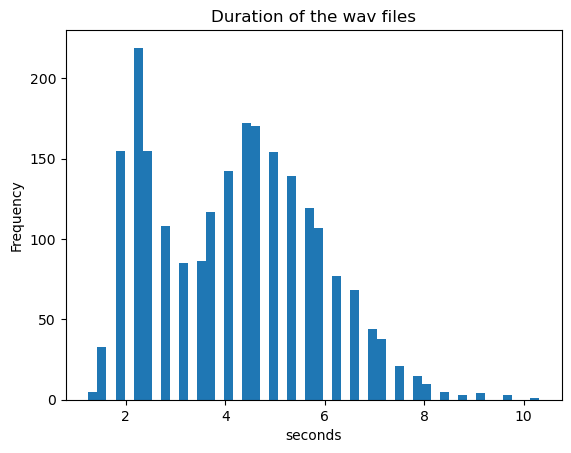

In [10]:
# Plot the distribution of the duration of the wav files
df['duration'].plot(kind='hist', bins=50, title='Duration of the wav files')
plt.xlabel('seconds')

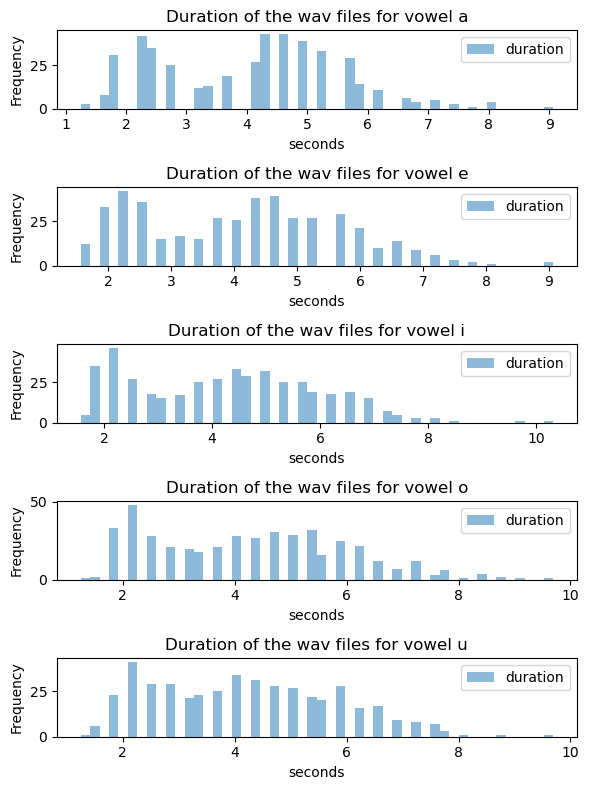

In [11]:
# Plot the distribution of the duration of the wav files for each vowel
fig, axs = plt.subplots(len(df['vowel'].unique()), 1, figsize=(6, 8))

for i, (vowel, group) in enumerate(df.groupby('vowel')):
    ax = axs[i]
    group['duration'].plot(kind='hist', bins=50, alpha=0.5, legend=True, ax=ax)
    ax.set_xlabel('seconds')
    ax.set_title(f'Duration of the wav files for vowel {vowel}')
    
plt.tight_layout()
plt.show()

* #### Describe the clinical features of the cases (patients)

In [12]:
# Add BMI column to the dataframe
df['BMI'] = df['Weight'] / (df['Height'] / 100) ** 2


In [13]:
# Describe the AHI, BMI, Age, Weight, Height and Cervical column for unique patients.
# Print with only one decimal place
df.groupby('Patient')[['IAH', 'BMI', 'Age', 'Weight', 'Height', 'Cervical']].mean().describe().round(1)


,IAH,BMI,Age,Weight,Height,Cervical
count,451.0,451.0,451.0,451.0,451.0,451.0
mean,22.4,29.8,48.8,91.7,175.4,42.2
std,18.3,5.1,12.6,17.2,7.3,3.2
min,0.0,20.1,20.0,61.0,152.0,34.0
25%,8.6,26.2,39.0,80.0,170.0,40.0
50%,17.0,28.7,48.0,89.0,175.0,42.0
75%,33.0,32.4,58.0,100.0,180.0,44.0
max,102.0,52.3,85.0,162.0,197.0,53.0


In [18]:
df


,Patient,Gender,IAH,Weight,Age,Height,Cervical,wav_file,vowel,duration,sample_rate,BMI
0,P0004,hombre,19.7,78,39,168,42,LB4_F5R1.wav,a,3.125034,22050,27.636054
1,P0004,hombre,19.7,78,39,168,42,LB4_F6R1.wav,e,2.500000,22050,27.636054
2,P0004,hombre,19.7,78,39,168,42,LB4_F7R1.wav,i,2.500000,22050,27.636054
3,P0004,hombre,19.7,78,39,168,42,LB4_F8R1.wav,o,2.500000,22050,27.636054
4,P0004,hombre,19.7,78,39,168,42,LB4_F9R1.wav,u,2.500000,22050,27.636054
...,...,...,...,...,...,...,...,...,...,...,...,...
2250,P0680,hombre,52.2,90,50,180,42,LB680_F5R1.wav,a,7.500000,22050,27.777778
2251,P0680,hombre,52.2,90,50,180,42,LB680_F6R1.wav,e,8.125034,22050,27.777778
2252,P0680,hombre,52.2,90,50,180,42,LB680_F7R1.wav,i,10.312517,22050,27.777778
2253,P0680,hombre,52.2,90,50,180,42,LB680_F8R1.wav,o,7.812517,22050,27.777778


In [ ]:
# Finally, save the dataframe to a new excel file
#  df.to_excel('drive/MyDrive/OSA_DATA/MYOWN_OSA_DB_UPM_Vowels_Recordings_with_duration_sample_rate_BMI.xlsx', index=False)